In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
data = pd.read_csv("obesity_level.csv")

In [12]:
# Encode Categorical Variables
categorical_features = ['Gender', 'CAEC', 'CALC', 'MTRANS']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Scale Numerical Variables
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head(20)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad,Cluster
0,0,1,0.105699,-0.002828,-0.235713,1,1,-0.836279,0.314684,3,0,1.206594,0,-1.171141,0.597438,2,3,Overweight_Level_II,5
1,1,0,-1.027052,-1.606291,-1.170931,1,1,-0.836279,0.338364,2,0,-0.048349,0,0.021775,0.636513,0,0,0rmal_Weight,4
2,2,0,-1.027052,0.128451,-1.430012,1,1,-1.060332,-1.913423,3,0,-0.195644,0,-0.138022,1.755239,0,3,Insufficient_Weight,0
3,3,0,-0.507929,0.120090,1.644770,1,1,1.039171,0.338364,3,0,-0.584035,0,0.579896,0.271455,2,3,Obesity_Type_III,1
4,4,1,1.371197,2.450367,0.224054,1,1,0.438397,-1.119801,3,0,-0.081469,0,1.176486,0.523111,2,3,Overweight_Level_II,1
5,5,1,-1.004504,0.552963,-1.377438,1,1,0.888668,0.338364,3,0,0.177716,0,1.131226,0.636513,2,3,Insufficient_Weight,4
6,6,1,1.062111,0.623825,0.941560,1,1,-0.852708,0.338364,3,0,-0.048349,0,-1.171141,0.133187,2,0,Obesity_Type_II,2
7,7,1,1.063597,0.571586,1.149362,1,1,-1.966298,0.338364,3,0,-0.048349,0,-0.456996,-1.024344,2,0,Obesity_Type_II,2
8,8,1,-1.202863,-0.002805,-0.678111,0,1,-0.836279,0.338364,3,0,1.595165,1,0.021775,0.636513,0,3,Overweight_Level_I,5
9,9,0,0.379434,-0.703345,0.886616,1,1,1.039171,0.338364,3,0,0.990767,0,-1.171141,-0.661206,2,3,Obesity_Type_III,3


In [15]:
# K-Means clustering 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data[numerical_features + categorical_features])

data['Cluster'] = cluster_labels

data.head(20)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad,Cluster
0,0,1,0.105699,-0.002828,-0.235713,1,1,-0.836279,0.314684,3,0,1.206594,0,-1.171141,0.597438,2,3,Overweight_Level_II,4
1,1,0,-1.027052,-1.606291,-1.170931,1,1,-0.836279,0.338364,2,0,-0.048349,0,0.021775,0.636513,0,0,0rmal_Weight,4
2,2,0,-1.027052,0.128451,-1.430012,1,1,-1.060332,-1.913423,3,0,-0.195644,0,-0.138022,1.755239,0,3,Insufficient_Weight,0
3,3,0,-0.507929,0.120090,1.644770,1,1,1.039171,0.338364,3,0,-0.584035,0,0.579896,0.271455,2,3,Obesity_Type_III,1
4,4,1,1.371197,2.450367,0.224054,1,1,0.438397,-1.119801,3,0,-0.081469,0,1.176486,0.523111,2,3,Overweight_Level_II,1
5,5,1,-1.004504,0.552963,-1.377438,1,1,0.888668,0.338364,3,0,0.177716,0,1.131226,0.636513,2,3,Insufficient_Weight,4
6,6,1,1.062111,0.623825,0.941560,1,1,-0.852708,0.338364,3,0,-0.048349,0,-1.171141,0.133187,2,0,Obesity_Type_II,2
7,7,1,1.063597,0.571586,1.149362,1,1,-1.966298,0.338364,3,0,-0.048349,0,-0.456996,-1.024344,2,0,Obesity_Type_II,2
8,8,1,-1.202863,-0.002805,-0.678111,0,1,-0.836279,0.338364,3,0,1.595165,1,0.021775,0.636513,0,3,Overweight_Level_I,4
9,9,0,0.379434,-0.703345,0.886616,1,1,1.039171,0.338364,3,0,0.990767,0,-1.171141,-0.661206,2,3,Obesity_Type_III,3


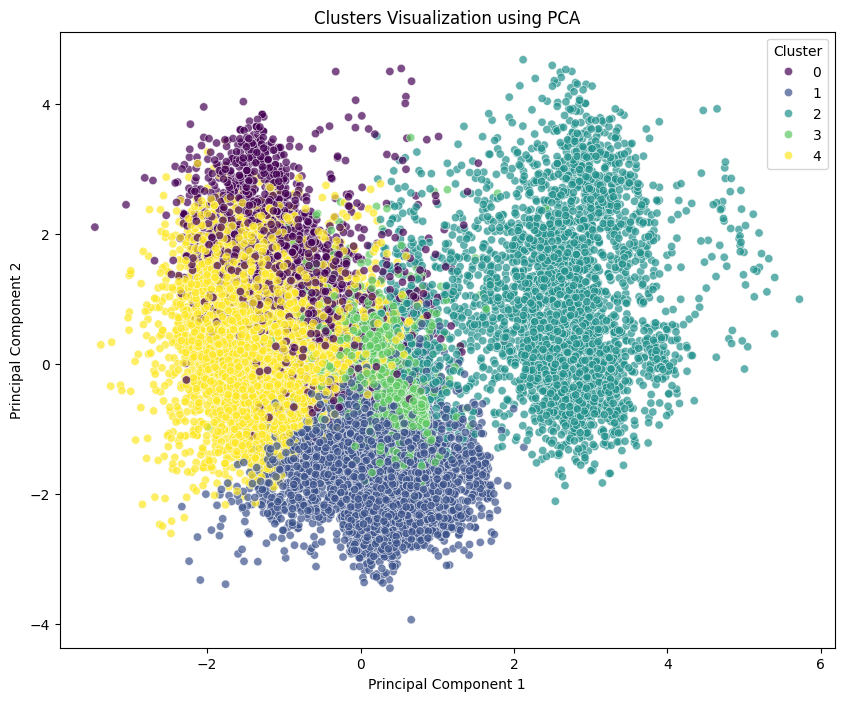

In [16]:
all_features = numerical_features + categorical_features

# PCA 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[all_features])

# Create a DataFrame with the principal components and cluster labels
pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels

# Plotting 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Clusters Visualization using PCA')
plt.show()


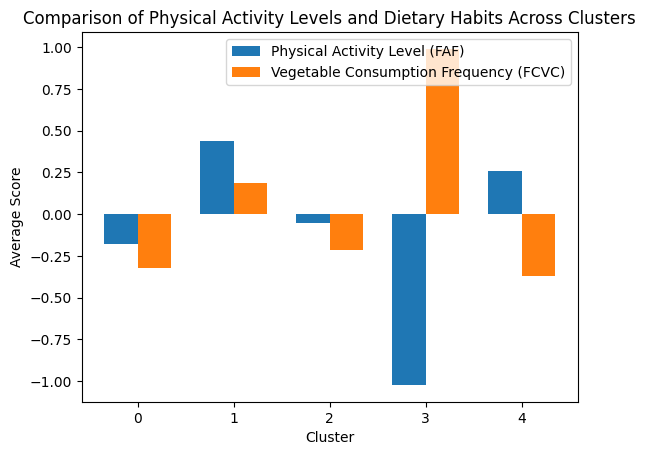

In [6]:
cluster_means = data.groupby('Cluster')[['FAF', 'FCVC']].mean().reset_index()

positions = np.arange(len(cluster_means['Cluster']))
width = 0.35

# Plotting both FAF & FCVC 
plt.bar(positions - width/2, cluster_means['FAF'], width, label='Physical Activity Level (FAF)')
plt.bar(positions + width/2, cluster_means['FCVC'], width, label='Vegetable Consumption Frequency (FCVC)')


plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.title('Comparison of Physical Activity Levels and Dietary Habits Across Clusters')
plt.xticks(positions, cluster_means['Cluster'])
plt.legend()


plt.show()
